1. Tahapan EDA

Struktur dataset (jumlah baris, kolom, tipe data)

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Baca dataset
df = pd.read_csv("heart.csv")

print("=== 5 Data Pertama ===")
display(df.head())

print("=== Jumlah Baris dan Kolom ===")
print(df.shape)

print("\n=== Tipe Data Setiap Kolom ===")
print(df.dtypes)

print("\n=== Informasi Dataset ===")
df.info()


Silakan unggah file 'heart.csv':


Saving heart.csv to heart.csv

=== 5 Data Pertama ===


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



=== Jumlah Baris dan Kolom ===
(918, 12)

=== Tipe Data Setiap Kolom ===
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngin

Statistik deskriptif

In [ ]:
# Statistik Deskriptif untuk Kolom Numerik
print("=== Statistik Deskriptif (Numerik) ===")
display(df.describe())

# Statistik Deskriptif untuk Kolom Kategorikal
print("\n=== Statistik Deskriptif (Kategorikal) ===")
display(df.describe(include="object"))

# Frekuensi Setiap Kolom Kategorikal
print("\n=== Frekuensi Nilai Setiap Kolom Kategorikal ===")
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


=== Statistik Deskriptif (Numerik) ===


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



=== Statistik Deskriptif (Kategorikal) ===


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460



=== Frekuensi Nilai Setiap Kolom Kategorikal ===

--- Sex ---
Sex
M    725
F    193
Name: count, dtype: int64

--- ChestPainType ---
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

--- RestingECG ---
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

--- ExerciseAngina ---
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

--- ST_Slope ---
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


Visualisasi dasar (distribusi, korelasi, missing value)

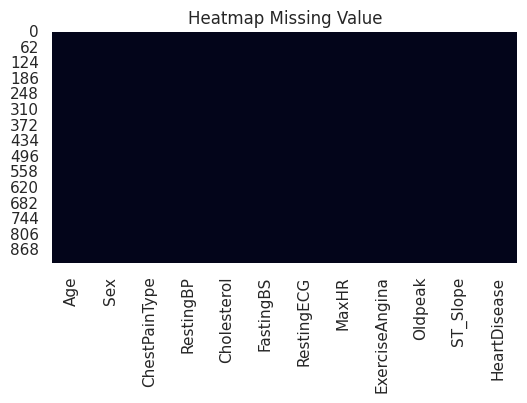

=== Jumlah Missing Value Setiap Kolom ===
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Heatmap Missing Value
plt.figure(figsize=(6,3))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap Missing Value")
plt.show()

# Hitung jumlah missing value tiap kolom
print("=== Jumlah Missing Value Setiap Kolom ===")
print(df.isnull().sum())


Histogram untuk fitur numerik

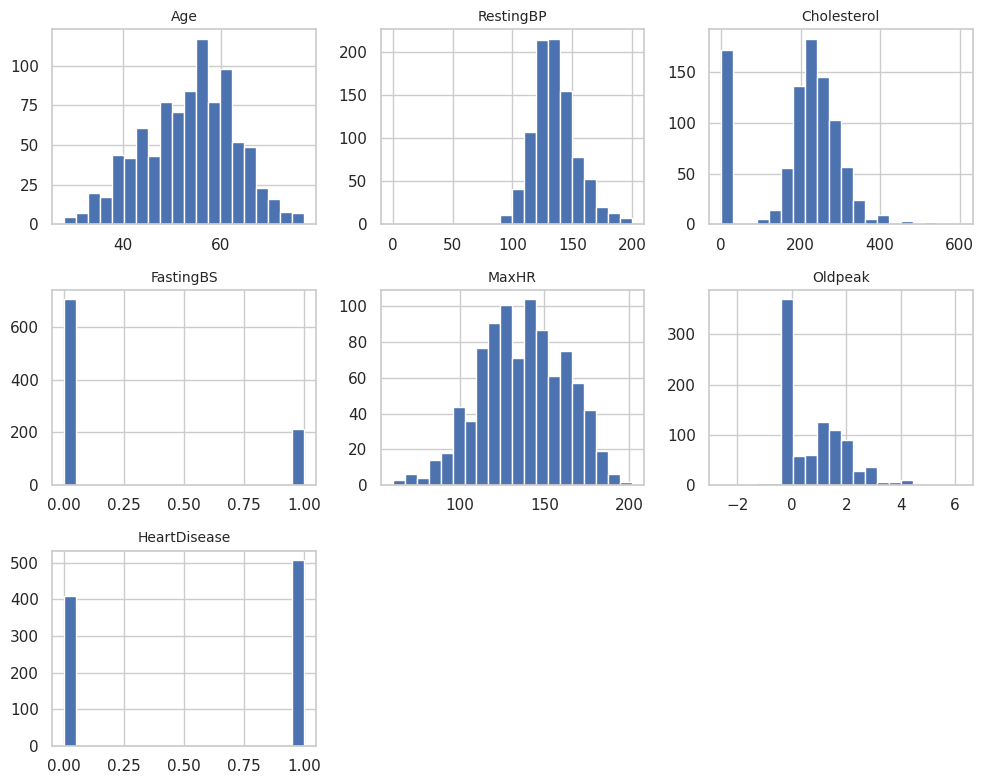

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=20)
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

Countplot untuk kolom kategorikal

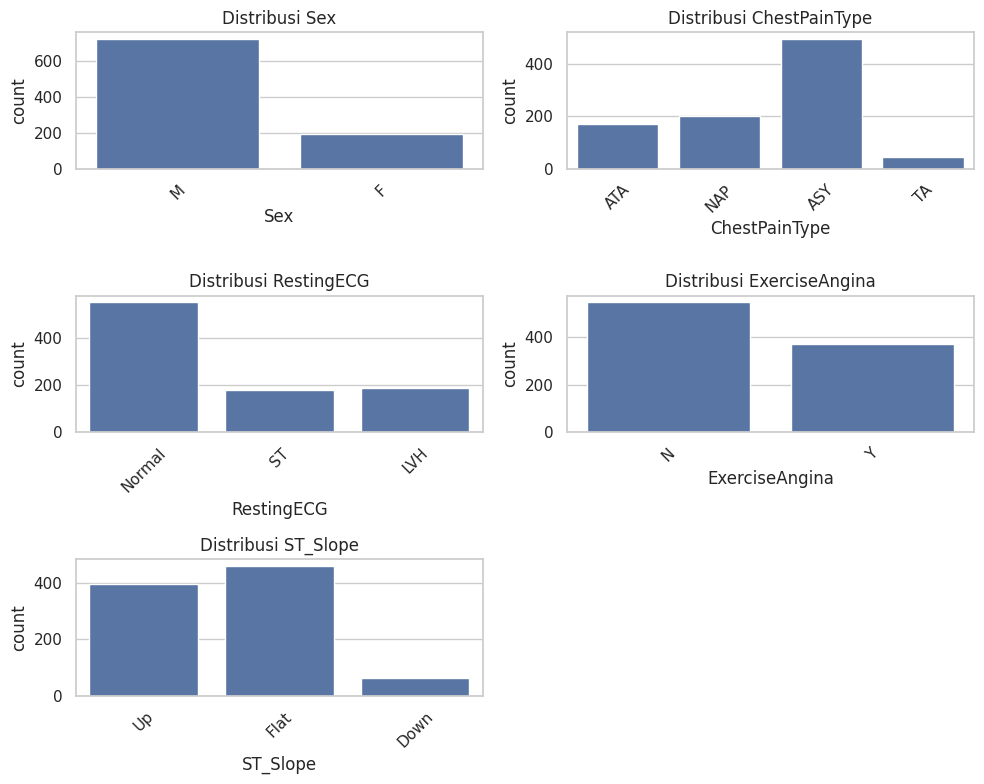

In [ ]:
cat_cols = df.select_dtypes(include="object").columns

plt.figure(figsize=(10,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Korelasi antar fitur numerik

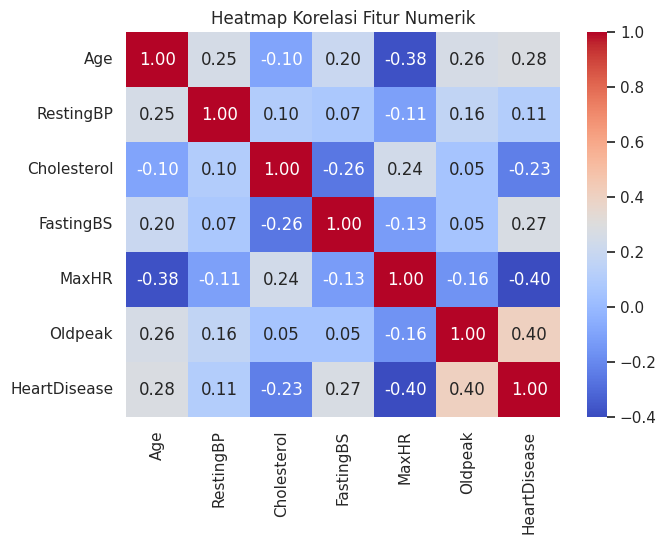

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()